In [1]:
import torch
import torch.nn as nn
from PIL import Image
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os
import math

In [3]:
PATH= Path('data/mnist/')

In [7]:
!ls

Adsız.pages                    Mehmet Uzel HW3.ipynb
Mehmet Uzel HW3 Question 2.pdf data


In [8]:
image = Image.open("data/mnist/train/1/img_9940.jpg")

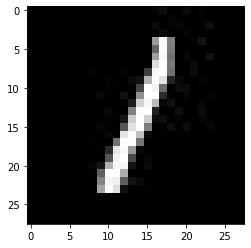

In [9]:
plt.imshow(image, cmap='gray')

In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame(np.array(image))

In [12]:
df.style.set_properties().background_gradient("Greys")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,4,15,0,0,10,0,5,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,4,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,12,0,3,7,0,1,3,14,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,5,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,249,128,1,0,4,19,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,102,251,124,0,2,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,158,248,113,0,9,0,0,18,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,219,255,121,0,1,9,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,4,0,0,0,5,0,0,63,248,255,114,0,0,12,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,4,2,0,11,17,178,255,225,36,10,0,0,5,3,0,0,0,0


In [13]:
list(PATH.iterdir())

[PosixPath('data/mnist/.DS_Store'),
 PosixPath('data/mnist/train'),
 PosixPath('data/mnist/validation')]

In [14]:
Path.ls = lambda x: list(x.iterdir())

In [15]:
(PATH/"train").ls()

[PosixPath('data/mnist/train/9'),
 PosixPath('data/mnist/train/0'),
 PosixPath('data/mnist/train/7'),
 PosixPath('data/mnist/train/6'),
 PosixPath('data/mnist/train/1'),
 PosixPath('data/mnist/train/8'),
 PosixPath('data/mnist/train/4'),
 PosixPath('data/mnist/train/3'),
 PosixPath('data/mnist/train/2'),
 PosixPath('data/mnist/train/5')]

In [16]:
(PATH/"train/3").ls()

[PosixPath('data/mnist/train/3/img_28119.jpg'),
 PosixPath('data/mnist/train/3/img_14838.jpg'),
 PosixPath('data/mnist/train/3/img_12291.jpg'),
 PosixPath('data/mnist/train/3/img_33539.jpg'),
 PosixPath('data/mnist/train/3/img_25429.jpg'),
 PosixPath('data/mnist/train/3/img_33263.jpg'),
 PosixPath('data/mnist/train/3/img_14804.jpg'),
 PosixPath('data/mnist/train/3/img_31474.jpg'),
 PosixPath('data/mnist/train/3/img_39028.jpg'),
 PosixPath('data/mnist/train/3/img_39996.jpg'),
 PosixPath('data/mnist/train/3/img_23702.jpg'),
 PosixPath('data/mnist/train/3/img_30018.jpg'),
 PosixPath('data/mnist/train/3/img_27564.jpg'),
 PosixPath('data/mnist/train/3/img_35606.jpg'),
 PosixPath('data/mnist/train/3/img_22391.jpg'),
 PosixPath('data/mnist/train/3/img_14623.jpg'),
 PosixPath('data/mnist/train/3/img_20586.jpg'),
 PosixPath('data/mnist/train/3/img_21840.jpg'),
 PosixPath('data/mnist/train/3/img_19307.jpg'),
 PosixPath('data/mnist/train/3/img_21698.jpg'),
 PosixPath('data/mnist/train/3/img_16752

In [17]:
Image.open((PATH/"train/3").ls()[0])

In [18]:
fours = [img for img in (PATH/"train/4").ls()]

In [19]:
four = [torch.tensor(np.array(Image.open(img)), dtype=torch.float32) for img in fours]

In [22]:
fives = [img for img in (PATH/"train/5").ls()]

In [23]:
five = [torch.tensor(np.array(Image.open(img)), dtype=torch.float32) for img in fives]

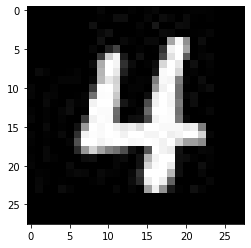

In [24]:
plt.imshow(four[4],cmap="gray")

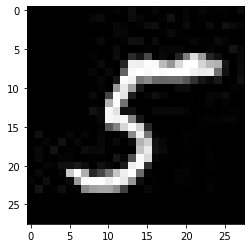

In [25]:
plt.imshow(five[5],cmap="gray")

In [26]:
four_stacked = torch.stack(four)/255

In [27]:
five_stacked = torch.stack(five)/255

In [28]:
valid_four = torch.stack([torch.tensor(np.array(Image.open(img)), dtype=torch.float32) for img in (PATH/"validation/4").ls()])

In [29]:
valid_five = torch.stack([torch.tensor(np.array(Image.open(img)), dtype=torch.float32) for img in (PATH/"validation/5").ls()])

In [30]:
four_file = open("four_file.txt", "w")
five_file = open("five_file.txt", "w")
four_valid = open("four_valid.txt", "w")
five_valid = open("five_valid.txt", "w")

In [31]:
torch.save(four_stacked, 'four_file.txt')
torch.save(five_stacked, 'five_file.txt')
torch.save(valid_four, 'four_valid.txt')
torch.save(valid_five, 'five_valid.txt')

In [32]:
valid_four = torch.load('four_valid.txt')
valid_five = torch.load('five_valid.txt')
four_stacked = torch.load('four_file.txt')
five_stacked = torch.load('five_file.txt')

In [33]:
train_x = torch.cat([five_stacked, four_stacked]).view(-1, 28*28)
train_y = torch.tensor([1] * len(five_stacked) + [0] * len(four))

In [34]:
train_y.unsqueeze_(-1)
train_y.shape

torch.Size([5755, 1])

In [35]:
valid_x = torch.cat([valid_five, valid_four]).view(-1, 28*28)
valid_y = torch.tensor([1] * len(valid_five) + [0] * len(valid_four))

In [36]:
valid_y.unsqueeze_(1)
valid_x.shape, valid_y.shape

(torch.Size([2112, 784]), torch.Size([2112, 1]))

In [37]:
class Dataset():
    def __init__(self, x, y): 
        self.x,self.y = x,y
    def __len__(self): 
        return len(self.x)
    def __getitem__(self, i): 
        return self.x[i],self.y[i]

In [38]:
ds_train = Dataset(train_x, train_y)
ds_valid = Dataset(valid_x, valid_y)

In [39]:
def init(size):
    return torch.randn(size, dtype=torch.float32).requires_grad_()

In [40]:
w = init((28*28,1))
b = init(1)
w.shape, b.shape

(torch.Size([784, 1]), torch.Size([1]))

In [41]:
def non_random_weights(X,y):
  from sklearn.linear_model import LogisticRegression
  model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
  model.fit(X, y)
  w2 = model.coef_
  w2.resize(784,1)
  w2 = (torch.tensor(model.coef_, dtype=torch.float32, requires_grad=True))
  b2 = model.intercept_
  b2 = torch.tensor(model.intercept_, dtype=torch.float32, requires_grad=True)
  return w2, b2

In [42]:
w2, b2 = non_random_weights(train_x, train_y)
w2.shape, b2.shape

/Users/mehmetuzel/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(torch.Size([784, 1]), torch.Size([1]))

In [43]:
class DataLoader():
    def __init__(self, ds, bs): 
        self.ds, self.bs = ds, bs
    def __iter__(self):
        n = len(self.ds)
        l = torch.randperm(n)
       
        for i in range(0, n, self.bs): 
            idxs_l = l[i:i+self.bs]
            yield self.ds[idxs_l]

In [44]:
train_dl = DataLoader(ds_train, bs = 512)

In [45]:
train_dl = DataLoader(ds_train, bs = 512)
xb, yb = next(iter(train_dl))
xb.shape, yb.shape

(torch.Size([512, 784]), torch.Size([512, 1]))

In [46]:
valid_dl = DataLoader(ds_valid, bs = 512)
xb, yb = next(iter(valid_dl))
xb.shape, yb.shape

(torch.Size([512, 784]), torch.Size([512, 1]))

In [47]:
def linear_layer(xb, w, b):
    return xb @ w + b

In [48]:
def leaky_relu(x):
  if x < 0:
    return 0.01
  else:
    return x

In [49]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

In [50]:
def loss_func(preds, targets, activation_f=sigmoid):
    preds = activation_f(preds)
    return torch.where(targets==1, 1-preds, preds).mean()

In [51]:
def accuracy(preds, actuals, activation_f=sigmoid):
    preds = activation_f(preds)
    correct = (preds > 0.5) == actuals
    return correct.float().mean()

In [52]:
def validation_acc(model, w, b):
    return torch.stack([accuracy(model(xb, w, b), yb) for xb, yb in valid_dl]).mean().item()

In [53]:
def train(model, w, b, lr, epochs=5, valid_epoch=5, activation_f=sigmoid):
    params = w, b
    for epoch in range(epochs):
        for xb, yb in train_dl:
            preds = model(xb, w, b)
            loss = loss_func(preds, yb)
            loss.backward()
            for p in params:
                p.data = p.data - p.grad * lr
                p.grad.zero_()
        
        if epoch % valid_epoch == 0:
            print(validation_acc(model, w, b))

In [54]:
train(linear_layer, w, b, lr=1, epochs= 20, valid_epoch=2, activation_f=sigmoid)

0.760937511920929
0.908203125
0.9359375238418579
0.9453125
0.9496093988418579
0.958203136920929
0.959765613079071
0.962109386920929
0.9652343988418579
0.975781261920929


In [55]:
train(linear_layer, w, b, lr=1, epochs= 20, valid_epoch=2, activation_f=leaky_relu)

0.9710937738418579
0.97265625
0.9800781011581421
0.9781249761581421
0.9789062738418579
0.9828125238418579
0.9800781011581421
0.977734386920929
0.981249988079071
0.981249988079071


In [56]:
train(linear_layer, w2, b2, lr=1, epochs= 20, valid_epoch=2, activation_f=sigmoid)

0.983203113079071
0.983203113079071
0.9839843511581421
0.975781261920929
0.9781249761581421
0.981249988079071
0.9839843511581421
0.978515625
0.981249988079071
0.975781261920929


In [57]:
train(linear_layer, w2, b2, lr=1, epochs= 20, valid_epoch=2, activation_f=leaky_relu)

0.9839843511581421
0.9847656488418579
0.983593761920929
0.9730468988418579
0.978515625
0.975390613079071
0.984375
0.984375
0.981249988079071
0.984375


In [58]:
x = torch.arange(-20,20)

In [59]:
y = [leaky_relu(xi) for xi in x]

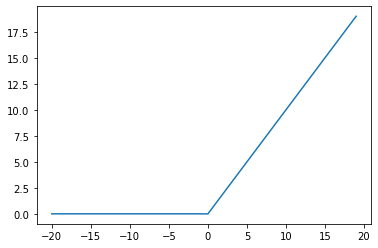

In [60]:
plt.plot(x,y);

In [61]:
def loss_func(preds, targets, activation_f=sigmoid):
    preds = activation_f(preds)
    return torch.where(targets==1, 1-preds, preds).mean()
def calculate_grad(model, xb, yb):
    preds = model(xb)
    loss = loss_func(preds, yb)
    loss.backward()
def validation_acc(model):
    return torch.stack([accuracy(model(xb), yb) for xb, yb in valid_dl]).mean().item()
def train(model, epochs=5, valid_epoch=5):
    for epoch in range(epochs):
        for xb, yb in train_dl:
            calculate_grad(model, xb, yb)
            optim.step()
            optim.zero_grad()
        
        if epoch % valid_epoch == 0:
            print(validation_acc(model))

In [62]:
import torch.optim as opt

In [63]:
lr = 1
model_1 = nn.Linear(28*28, 1)
optim = opt.SGD(model_1.parameters(), lr)
train(model_1, 20, 2)

0.969531238079071
0.9867187738418579
0.9839843511581421
0.9886718988418579
0.9886718988418579
0.989453136920929
0.9867187738418579
0.9898437261581421
0.9867187738418579
0.986328125


In [64]:
model = nn.Sequential(nn.Linear(28*28,60),
                      nn.ReLU(),
                      nn.Linear(60,1))

In [65]:
optim = opt.SGD(model.parameters(), lr=1)
train(model, 20, 2)

0.970703125
0.9769531488418579
0.989453136920929
0.989453136920929
0.9867187738418579
0.9859374761581421
0.990234375
0.9839843511581421
0.987109363079071
0.987109363079071
